# 非线性方程组求解

In [ ]:
# import packages
from math import sin, cos
from scipy import optimize
import pylab as pl

In [ ]:
pl.rcParams['font.sans-serif'] = [u'SimHei']
pl.rcParams['axes.unicode_minus'] = False

In [ ]:
def f(x):
  x0, x1, x2 = x.tolist()
  return [5 * x1 - 3, 
          4 * x0 * x0 - 2 * sin(x1 * x2),
          x1 * x2 - 1.5]


In [ ]:
res = optimize.fsolve(f, [1, 1, 1])
print(res)
print(f(res))

[0.70622057 0.6        2.5       ]
[0.0, 1.8729773287873286e-10, 7.549760816516482e-11]


# 最小二乘拟合

In [ ]:
import numpy as np

X = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])

def residual(p):
  k, b = p
  return Y - (k * X + b)


r = optimize.leastsq(residual, [1, 0])
k, b = r[0]
print("k = ", k, "b = ", b)

k =  0.6134953491930442 b =  1.794092543259387


In [ ]:
def func(x, p):
  A, K, theta = p
  return A * np.sin(2 * np.pi * k * x + theta)

def residual(p, y, x):
  return y - func(x, p)

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)
A, k, theta = 10, 0.34, np.pi / 6
y0 = func(x, [A, k, theta])

# 加入噪声
np.random.seed(0)
y1 = y0 + 2 * np.random.randn(len(x))

p0 = [7, 0.40, 0]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22768 (\N{CJK UNIFIED IDEOGRAPH-58F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

真实函数： [10, 0.34, 0.5235987755982988]
拟合参数： [10.25397883  0.4         0.55632335]


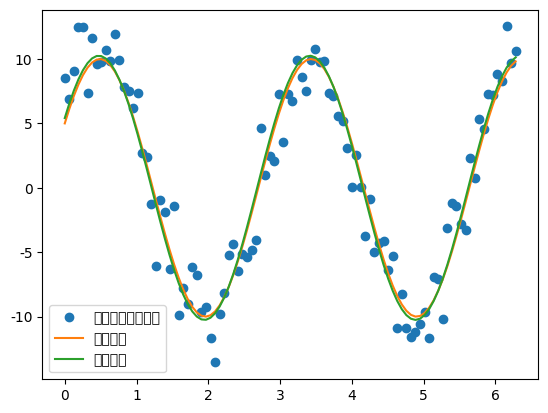

In [ ]:
plsq = optimize.leastsq(residual, p0, args=(y1, x))

print(u"真实函数：", [A, k, theta])
print(u"拟合参数：", plsq[0])

pl.plot(x, y1, "o", label=u"带噪声的实验数据")
pl.plot(x, y0, label=u"真实数据")
pl.plot(x, func(x, plsq[0]), label=u"拟合数据")
pl.legend(loc="best")
pl.show()

# 特征向量


In [ ]:
from scipy import linalg
A = np.array([[1, -0.3], [-0.1, 0.9]])
evalues, evectors = linalg.eig(A)

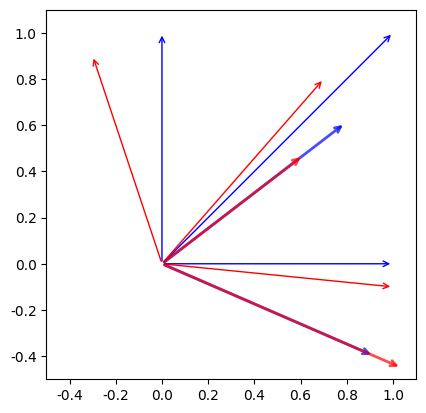

In [ ]:
# 线性变换将蓝色箭头变换为红色箭头
points = np.array([[0, 1.0], [1.0, 0], [1, 1]])
def draw_arrows(points, **kw):
    props = dict(color="blue", arrowstyle="->")
    props.update(kw)
    for x, y in points:
        pl.annotate("",
                    xy=(x, y), xycoords='data',
                    xytext=(0, 0), textcoords='data',
                    arrowprops=props)

draw_arrows(points)
draw_arrows(np.dot(A, points.T).T, color="red")
draw_arrows(evectors.T, alpha=0.7, linewidth=2)
draw_arrows(np.dot(A, evectors).T, color="red", alpha=0.7, linewidth=2)

ax = pl.gca()
ax.set_aspect("equal")
ax.set_xlim(-0.5, 1.1)
ax.set_ylim(-0.5, 1.1)
pl.show()


In [ ]:
A = np.array([[1, -0.3], [-0.1, 0.9]])
B = np.array([[1, 0.5], [0.7, -0.9]])
evalues, evectors = linalg.eig(A, B)
print(evalues)
print(evectors)

[ 0.7367235+0.j -0.9447235+0.j]
[[-0.93041671  0.08828439]
 [-0.36650341 -0.99609531]]


# 椭圆拟合求解

In [ ]:
np.random.seed(42)
t = np.random.uniform(0, 2 * np.pi, 60)

alpha = 0.4
a = 0.5
b = 1.0
x = 1.0 + a * np.cos(t) * np.cos(alpha) - b * np.sin(t) * np.sin(alpha)
y = 1.0 + a * np.cos(t) * np.sin(alpha) - b * np.sin(t) * np.cos(alpha)
x += np.random.normal(0, 0.05, size=len(x))
y += np.random.normal(0, 0.05, size=len(y))

In [ ]:
D = np.c_[x ** 2, x * y, y ** 2, x, y, np.ones_like(x)]
A = np.dot(D.T, D)
C = np.zeros((6, 6))
C[[0, 1, 2], [2, 1, 0]] = 2, -1, 2
evalues, evectors = linalg.eig(A, C)  # ❶
evectors = np.real(evectors)
err = np.mean(np.dot(D, evectors) ** 2, 0)  # ❷
p = evectors[:, np.argmin(err)]  # ❸
print(p)

[-0.55214278  0.5580915  -0.23809922  0.54584559 -0.08350449 -0.14852803]


In [ ]:
# 用广义特征向量计算的拟合椭圆
def ellipse(p, x, y):
    a, b, c, d, e, f = p
    return a * x ** 2 + b * x * y + c * y ** 2 + d * x + e * y + f

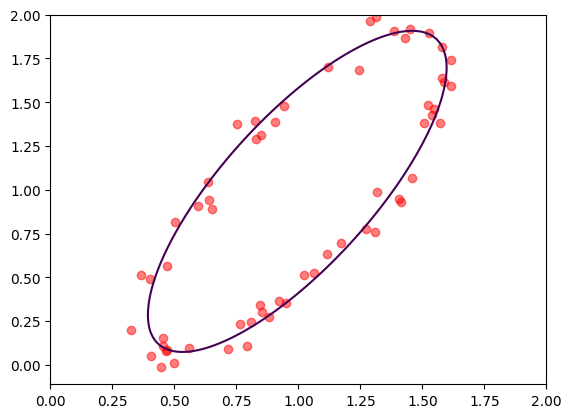

In [ ]:
X, Y = np.mgrid[0:2:100j, 0:2:100j]
Z = ellipse(p, X, Y)
pl.plot(x, y, "ro", alpha=0.5)
pl.contour(X, Y, Z, levels=[0])
pl.show()

<ipython-input-23-b90e13c39ea4>:16: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1.5)


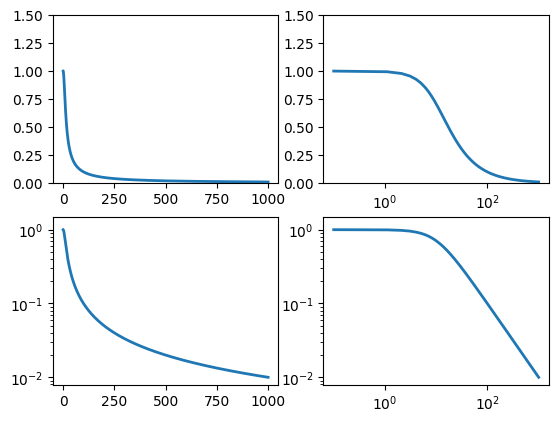

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
# ## 绘图函数简介

# ### 对数坐标图
#%fig=低通滤波器的频率响应：算术坐标（左上）、X轴对数坐标（右上）、Y轴对数坐标（左下）、双对数坐标（右上） 
w = np.linspace(0.1, 1000, 1000)
p = np.abs(1/(1+0.1j*w)) # 计算低通滤波器的频率响应

fig, axes = plt.subplots(2, 2)
functions = ("plot", "semilogx", "semilogy", "loglog")

for ax, fname in zip(axes.ravel(), functions):
    func = getattr(ax, fname)
    func(w, p, linewidth=2)
    ax.set_ylim(0, 1.5)
plt.show()

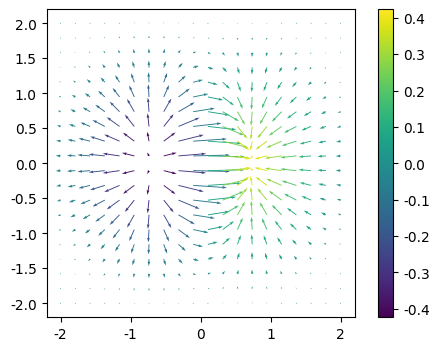

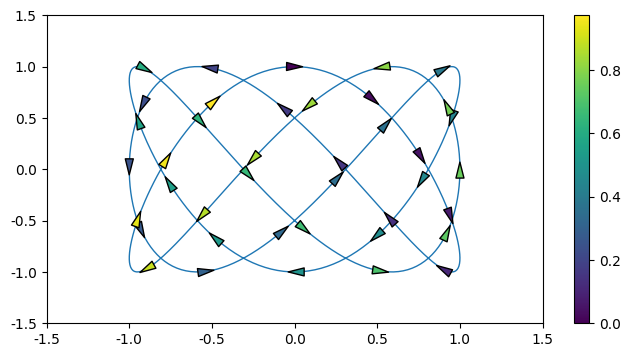

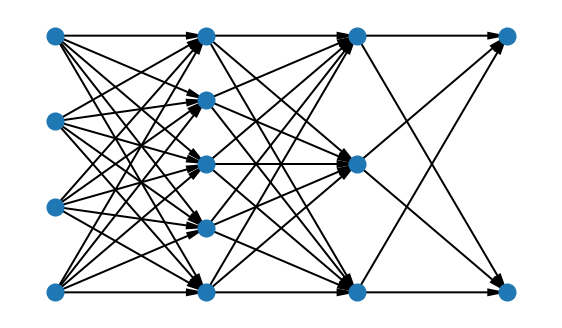

In [26]:
# ### 箭头图
#%fig=用quiver()绘制矢量场
def f(x, y):
    return x * np.exp(- x**2 - y**2)

def vec_field(f, x, y, dx=1e-6, dy=1e-6):
    x2 = x + dx
    y2 = y + dy
    v = f(x, y)
    vx = (f(x2, y) - v) / dx
    vy = (f(x, y2) - v) / dy 
    return vx, vy
plt.figure(figsize=(6, 4))  
X, Y = np.mgrid[-2:2:20j, -2:2:20j]
C = f(X, Y)
U, V = vec_field(f, X, Y)
plt.quiver(X, Y, U, V, C)
plt.colorbar();
plt.gca().set_aspect("equal")
plt.show()


#%fig=使用箭头表示参数曲线的切线方向
plt.figure(figsize=(8, 4))
n = 40
arrow_size = 16
t = np.linspace(0, 1, 1000)
x = np.sin(3*2*np.pi*t)
y = np.cos(5*2*np.pi*t)
line, = plt.plot(x, y, lw=1)

lengths = np.cumsum(np.hypot(np.diff(x), np.diff(y)))
length = lengths[-1]
arrow_locations = np.linspace(0, length, n, endpoint=False)
index = np.searchsorted(lengths, arrow_locations)
dx = x[index + 1] - x[index]
dy = y[index + 1] - y[index]
ds = np.hypot(dx, dy)
dx /= ds
dy /= ds
plt.quiver(x[index], y[index], dx, dy, t[index],
          units="dots", scale_units="dots", 
          angles="xy", scale=1.0/arrow_size, pivot="middle",
          edgecolors="black", linewidths=1,
          width=1, headwidth=arrow_size*0.5, 
          headlength=arrow_size, headaxislength=arrow_size, 
          zorder=100)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

#%fig=使用quiver()绘制神经网络结构示意图
plt.figure(figsize=(7, 4))
levels = [4, 5, 3, 2]
x = np.linspace(0, 1, len(levels))

for i in range(len(levels) - 1):
    j = i + 1
    n1, n2 = levels[i], levels[j]
    y1, y2 = np.mgrid[0:1:n1*1j, 0:1:n2*1j]
    x1 = np.full_like(y1, x[i])
    x2 = np.full_like(y2, x[j])
    plt.quiver(x1, y1, x2-x1, y2-y1, 
              angles="xy", units="dots", scale_units="xy", 
              scale=1, width=2, headlength=10,
              headaxislength=10, headwidth=4)
    
yp = np.concatenate([np.linspace(0, 1, n) for n in levels])
xp = np.repeat(x, levels)
plt.plot(xp, yp, "o", ms=12)
plt.gca().axis("off")
plt.margins(0.1, 0.1)
plt.show()

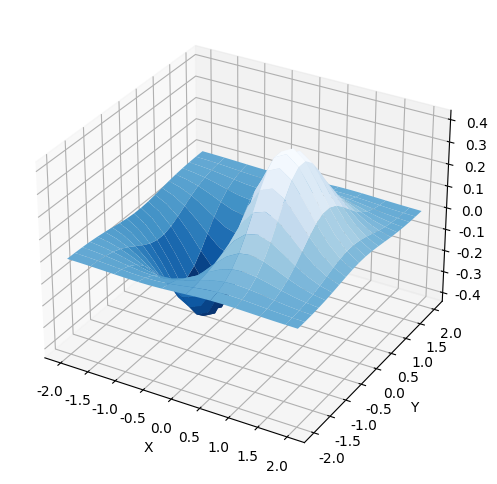

In [27]:
# ### 三维绘图
#%fig=使用mplot3D绘制的三维曲面图

x, y = np.mgrid[-2:2:20j, -2:2:20j] #❷
z = x * np.exp( - x**2 - y**2)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d') #❸
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap = plt.cm.Blues_r) #❹
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()